<h2>KNN Image Classification with OpenCV

Libraries for data processing and visualization:


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from imutils import paths
import seaborn as sns
import random
import time
from datetime import datetime

Libraries for image pre-processing and classification:


In [2]:
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


Libraries for OS and Cloud:


In [3]:
import os


##  getting your images 


In [4]:
import json
with open('images/_annotations.json', 'r') as f:
    annotations = json.load(f)
image_dir = 'images'
image_files = os.listdir(image_dir)

# Select a random image file
random_filename = os.path.join(image_dir, random.choice(image_files))

# Get the annotation for the selected image file
annotation = annotations['annotations'][os.path.basename(random_filename)]

# Print the random annotation
print(annotation) 
   

[{'label': 'start', 'id': 'e7137e83-08b6-4eb1-bb36-488ee0758fdf'}]


In [5]:
import os
image_paths = [os.path.join('images', filename) for filename in os.listdir('images') if filename.endswith('.jpg')]

# Load and Plot and Image

We will train and classify your images using the k-NN classifier using the <code>OpenCV</code> library. 

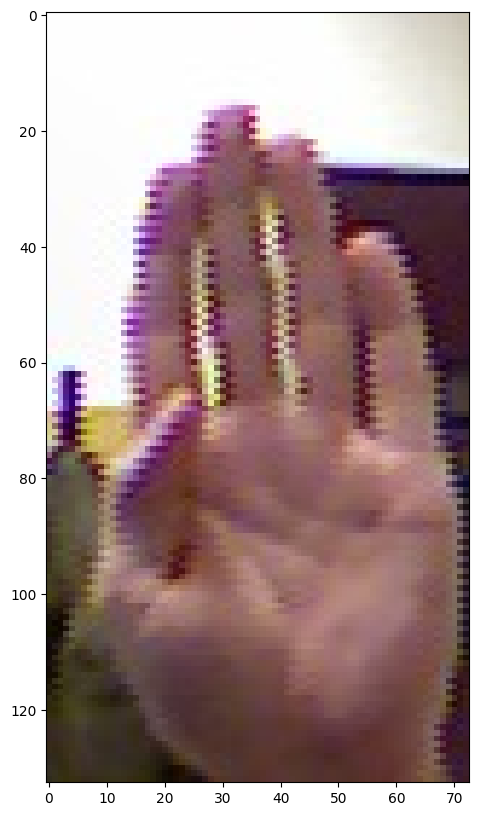

In [6]:
sample_image = cv2.imread(random_filename)
## Convert to RGB
image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
## Now plot the image
plt.figure(figsize=(10,10))
plt.imshow(image, cmap = "gray")
plt.show()

To perform KNN on the dataset, we will need to process the data.

Convert image to grayscale - grayscale simplifies the algorithm and reduces computational requirements.


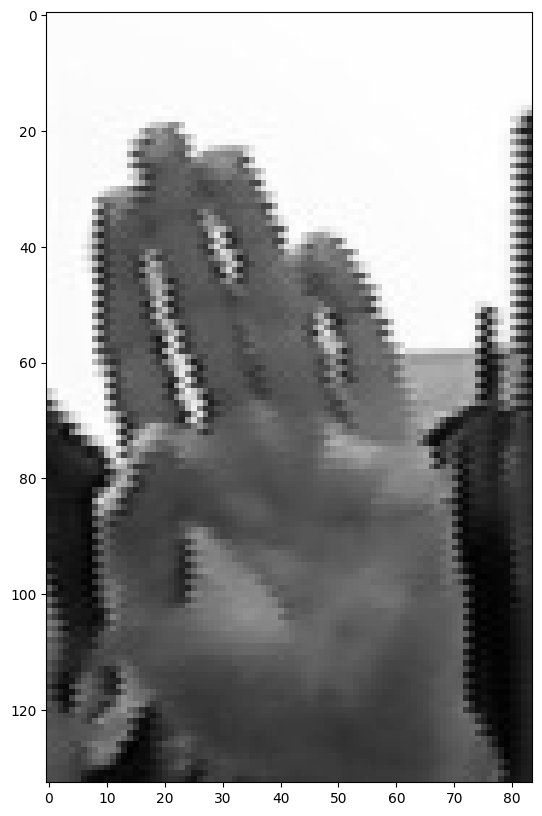

In [7]:
sample_image = cv2.cvtColor(sample_image,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.imshow(sample_image, cmap = "gray")
plt.show()

Resize image - resizing image helps the algorithm train faster.


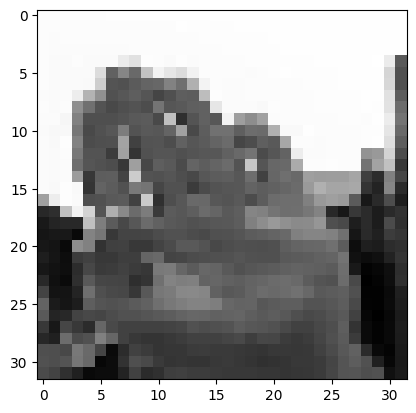

In [8]:
sample_image = cv2.resize(sample_image, (32, 32))
plt.imshow(sample_image, cmap = "gray")
plt.show()

Flatten image - makes the image a numpy array for the algorithm to handle and recognize.


In [7]:
pixels = sample_image.flatten()
pixels

array([254, 254, 254, ...,  35,  27,  58], dtype=uint8)

## Repeating the Process for All Images


In [8]:
#image_paths = list(paths.list_images('images'))
train_images = []
train_labels = []

# get the list of label names
class_object = annotations['labels']
# create a dictionary that maps label names to label indices
label_map = {label_name: i for i, label_name in enumerate(class_object)}

# loop over the input images
for (i, image_path) in enumerate(image_paths):
    # read image
    image = cv2.imread(image_path)
    # make images gray
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    
    # get the label index for the image
    filename = os.path.basename(image_path)
    if filename in annotations['annotations']:
        label_name = annotations['annotations'][filename][0]['label']
        if label_name in label_map:
            label = label_map[label_name]
            print('Loaded...', '\U0001F483', 'Image', str(i+1), 'is a', label_name)
        else:
            print(f"Unknown label {label_name} for image {image_path}")
            continue  # skip this image if the label is unknown
    else:
        print(f"No annotations found for {image_path}")
        continue  # skip this image if there is no annotation
    
    # resize image
    image = cv2.resize(image, (32, 32))
    # flatten the image
    pixels = image.flatten()
    #Append flattened image to
    train_images.append(pixels)
    train_labels.append(label)


Loaded... 💃 Image 1 is a right
Loaded... 💃 Image 2 is a stop
Loaded... 💃 Image 3 is a left
Loaded... 💃 Image 4 is a left
Loaded... 💃 Image 5 is a left
Loaded... 💃 Image 6 is a left
Loaded... 💃 Image 7 is a start
Loaded... 💃 Image 8 is a left
Loaded... 💃 Image 9 is a stop
Loaded... 💃 Image 10 is a stop
Loaded... 💃 Image 11 is a right
Loaded... 💃 Image 12 is a stop
Loaded... 💃 Image 13 is a right
Loaded... 💃 Image 14 is a right
Loaded... 💃 Image 15 is a start
Loaded... 💃 Image 16 is a stop
Loaded... 💃 Image 17 is a stop
Loaded... 💃 Image 18 is a stop
Loaded... 💃 Image 19 is a right
Loaded... 💃 Image 20 is a stop
Loaded... 💃 Image 21 is a left
Loaded... 💃 Image 22 is a start
Loaded... 💃 Image 23 is a right
Loaded... 💃 Image 24 is a stop
Loaded... 💃 Image 25 is a stop
Loaded... 💃 Image 26 is a stop
Loaded... 💃 Image 27 is a right
Loaded... 💃 Image 28 is a start
Loaded... 💃 Image 29 is a left
Loaded... 💃 Image 30 is a left
Loaded... 💃 Image 31 is a left
Loaded... 💃 Image 32 is a start
Loade

Creating an array of the <code>train_images</code> and <code>train_labels</code>. <code>OpenCV</code> only identifies arrays of type <code>float32</code> for the training samples and array of shape <code>(label size, 1)</code> for the training labels. this is done by specifying <code>astype('float32')</code> on the numpy array of the training samples and convert the training labels to integers and <code>reshape</code> the array to <code>(label size, 1)</code>. 

In [9]:
train_images = np.array(train_images).astype('float32')
train_labels = np.array(train_labels)


In [10]:
train_labels = train_labels.astype(int)
train_labels = train_labels.reshape((train_labels.size,1))
#print(train_labels)
print(train_images.shape)
print(train_labels.shape)



(880, 1024)
(880, 1)


In [11]:
test_size = 0.2
train_samples, test_samples, train_labels, test_labels = train_test_split(
    train_images, train_labels, test_size=test_size, random_state=0)


Split data into training and test set with a test size of your choice:


To train the KNN model, we will use the <code>cv2.ml.KNearest_create()</code> from the <code>OpenCV</code> library. We need to define how many nearest neighbors will be used for classification as a hyper-parameter k. This parameter k can be toggled with/tuned in the training or model validation process. Fit the training and test images and get the accuracy score of the model.

try multiple values of <code>k</code> to find the optimal value for the dataset we have. <code>k</code> refers to the number of nearest neighbours to include in the majority of the voting process.




In [12]:
start_datetime = datetime.now()

knn = cv2.ml.KNearest_create()
knn.train(train_samples, cv2.ml.ROW_SAMPLE, train_labels)

## get different values of K
k_values = [1, 2, 3, 4, 5]
k_result = []
for k in k_values:
    ret,result,neighbours,dist = knn.findNearest(test_samples,k=k)
    k_result.append(result)
flattened = []
for res in k_result:
    flat_result = [item for sublist in res for item in sublist]
    flattened.append(flat_result)

end_datetime = datetime.now()
print('Training Duration: ' + str(end_datetime-start_datetime))

Training Duration: 0:00:00.413743


We will get the accuracy value for each value of <code>k</code> i.e., how many percent of the images were classified correctly? We will create a confusion matrix for a more comprehensive classification model evaluation.


In [13]:
## create an empty list to save accuracy and the cofusion matrix
accuracy_res = []
con_matrix = []
## we will use a loop because we have multiple value of k
for k_res in k_result:
    label_names = [0, 1,2,3]
    cmx = confusion_matrix(test_labels, k_res, labels=label_names)
    con_matrix.append(cmx)
    ## get values for when we predict accurately
    matches = k_res==test_labels
    correct = np.count_nonzero(matches)
    ## calculate accuracy
    accuracy = correct*100.0/result.size
    accuracy_res.append(accuracy)
## stor accuracy for later when we create the graph
res_accuracy = {k_values[i]: accuracy_res[i] for i in range(len(k_values))}
list_res = sorted(res_accuracy.items())

Now let's visualize the confusion matrix:


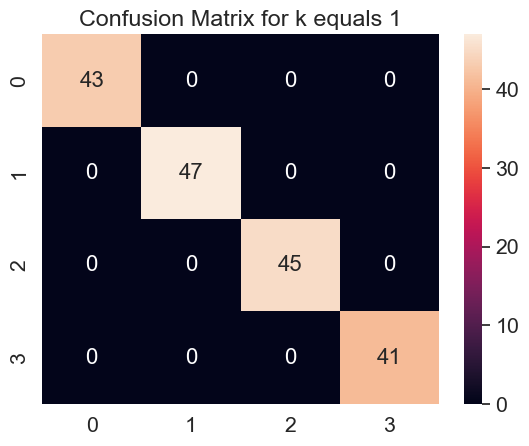

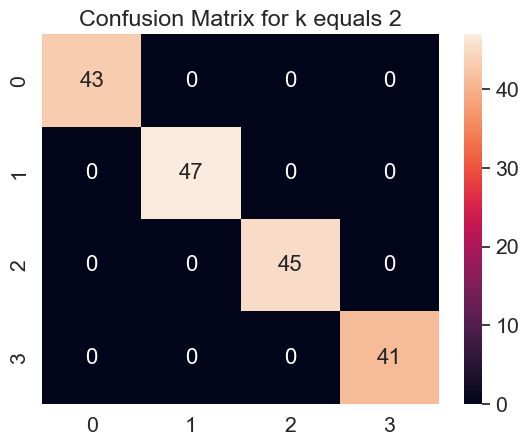

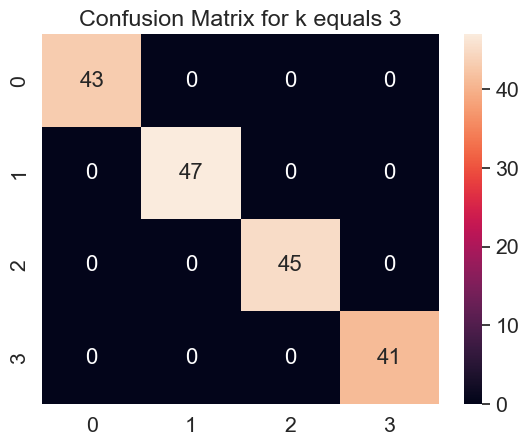

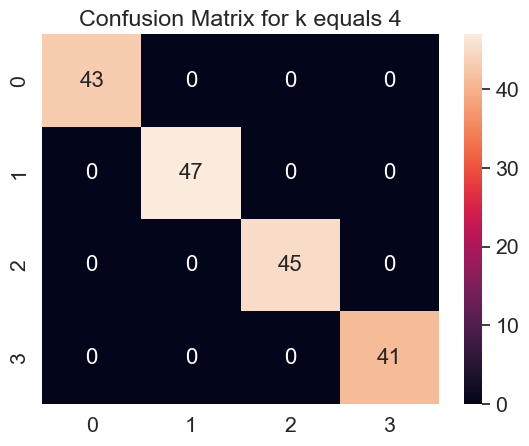

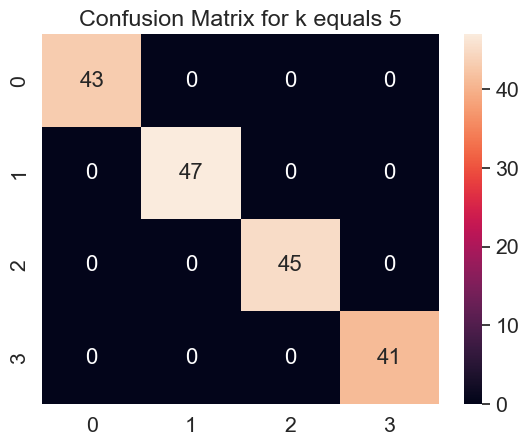

In [14]:
t=0
## for each value of k we will create a confusion matrix
for array in con_matrix:
    df_cm = pd.DataFrame(array)
    sns.set(font_scale=1.4) # for label size
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt = ".0f") # font size
    t += 1
    title = "Confusion Matrix for k equals " + str(t)
    plt.title(title)
    plt.show()
    


We will plot the accuracy to see which one is highest i.e., what percentage of images were classified correctly?


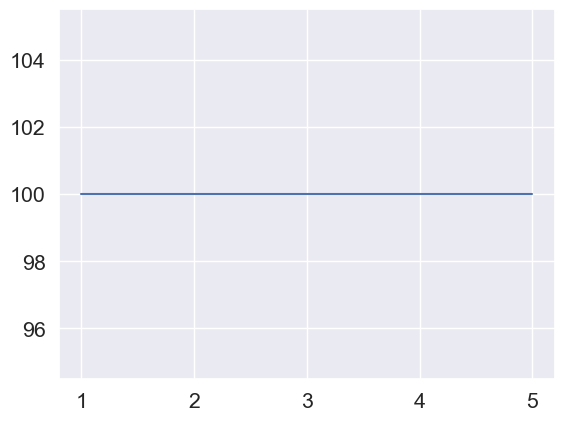

In [15]:
## plot accuracy against 
x, y = zip(*list_res)
plt.plot(x, y)
plt.show()

We will get the best value of <code>k</code> to train the model to test the model on our image:


In [16]:
k_best = max(list_res,key=lambda item:item[1])[0]
k_best

1

Save the KNN model to a file:


In [17]:
knn.save('knn_samples.yml')

## USING THE MODEL

In [27]:


# Load the trained model
model_file = 'knn_samples.yml'
fs = cv2.FileStorage(model_file, cv2.FILE_STORAGE_READ)
knn_yml = fs.getNode('opencv_ml_knn')

knn_format = knn_yml.getNode('format').real()
is_classifier = knn_yml.getNode('is_classifier').real()

# Number of samples
default_k = knn_yml.getNode('default_k').real()

# Sample arrays
samples = knn_yml.getNode('samples').mat()

# Labels of samples
responses = knn_yml.getNode('responses').mat()

fs.release()

# Create KNN object and train the model
knn = cv2.ml.KNearest_create()
k_best = 1  # You can choose the k value based on your requirements
knn.train(samples, cv2.ml.ROW_SAMPLE, responses)

# Load the test image
test_image_file = 'stop.png'
test_image = cv2.imread(test_image_file)
#plt.show(test_image)

# Convert the image to grayscale and resize it to 32x32 pixels
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image = cv2.resize(test_image, (32, 32))

# Flatten the image into a 1D array and convert it to float32
pixel_image = test_image.flatten()
pixel_image = np.array([pixel_image]).astype('float32')

# Perform KNN classification on the test image
ret, result, neighbours, dist = knn.findNearest(pixel_image, k=k_best)

# Print the predicted label of the test image
#predicted_label = int(ret)
annotations = {
    'labels': ['start', 'stop', 'left', 'right'] #"start","stop","left","right"
}
predicted_label = annotations['labels'][int(result[0])]
print('The test image was classified as label', predicted_label)

The test image was classified as label right


This model is classifying correctly on the unseen images from the same distribution but wrongly on other data